In [31]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *
import keras.backend as K

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
import pandas as pd
import keras
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout, Reshape
from keras.models import Model
import cv2
%matplotlib inline

In [3]:
import h5py
with h5py.File('dataset.h5','r') as hf:
    X = hf['X'][:]
    y = hf['y'][:]
    X_test = hf['X_test'][:]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)


In [5]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val  /= 255
X_test /= 255

X_train = X_train.reshape(-1,256,256,1)
X_val = X_val.reshape(-1,256,256,1)
X_test = X_test.reshape(-1,256,256,1)

In [53]:
X_train.shape

(120, 256, 256, 1)

In [6]:
# xsize, ysize = 128,128
# X_train_reshaped = np.zeros((X_train.shape[0], xsize, ysize, 1))
# for i in range(X_train.shape[0]):
#     X_train_reshaped[i] = cv2.resize(X_train[i], (xsize,ysize), interpolation=cv2.INTER_CUBIC).reshape((64,64,1))

# X_test_reshaped = np.zeros((X_test.shape[0], xsize, ysize, 1))
# for i in range(X_test.shape[0]):
#     X_test_reshaped[i] = cv2.resize(X_test[i], (xsize,ysize), interpolation=cv2.INTER_CUBIC).reshape((64,64,1))
    
# X_val_reshaped = np.zeros((X_val.shape[0], xsize, ysize, 1))
# for i in range(X_val.shape[0]):
#     X_val_reshaped[i] = cv2.resize(X_val[i], (xsize,ysize), interpolation=cv2.INTER_CUBIC).reshape((64,64,1))

In [7]:
# X_train_reshaped.shape, X_test_reshaped.shape, X_val_reshaped.shape

In [8]:
X_stacked = np.vstack([X_train, X_val])

In [9]:
def create(input_shape, drop_prob=0.6):

    X_input = Input(input_shape, name='input')    

    X = Conv2D(8, (9,9), strides=(1,1), padding='same')(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    
    X = Conv2D(16, (7,7), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(32, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(32, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(64, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(64, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(128, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Conv2D(256, (3,3), strides=(1,1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)

    X = Flatten()(X)
    X = Dense(50, activation='relu')(X)
    X = Dropout(drop_prob)(X)
    X = Dense(20, activation='relu')(X)
    X = Dropout(drop_prob)(X)
    X = Dense(1, activation='sigmoid')(X)

    model = Model(inputs=X_input, outputs=X)
    model.compile(
        optimizer='Adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
model = create(X_train.shape[1:], drop_prob=0.4)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 8)       656       
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      6288      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 16)      64        
__________

In [11]:
history = model.fit(X_train, y_train,
          batch_size=12,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 15s 127ms/step - loss: 0.7960 - acc: 0.5833 - val_loss: 0.7699 - val_acc: 0.5333
Epoch 2/50
120/120 [==============================] - 13s 105ms/step - loss: 0.7120 - acc: 0.5667 - val_loss: 0.6653 - val_acc: 0.6000
Epoch 3/50
120/120 [==============================] - 13s 105ms/step - loss: 0.7199 - acc: 0.4500 - val_loss: 0.6822 - val_acc: 0.5667
Epoch 4/50
120/120 [==============================] - 13s 111ms/step - loss: 0.6559 - acc: 0.5833 - val_loss: 0.6468 - val_acc: 0.6333
Epoch 5/50
120/120 [==============================] - 13s 107ms/step - loss: 0.6292 - acc: 0.6167 - val_loss: 0.7298 - val_acc: 0.6333
Epoch 6/50
120/120 [==============================] - 13s 107ms/step - loss: 0.4896 - acc: 0.7667 - val_loss: 0.5853 - val_acc: 0.6333
Epoch 7/50
120/120 [==============================] - 13s 105ms/step - loss: 0.4163 - acc: 0.8167 - val_loss: 0.7040 - val_acc: 0.6333
Epoch 8/50

plota gráfico de erro e acurácia

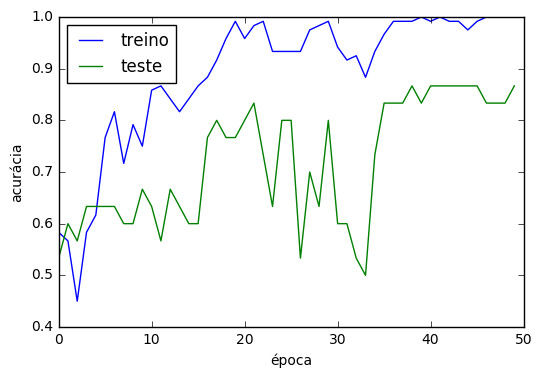

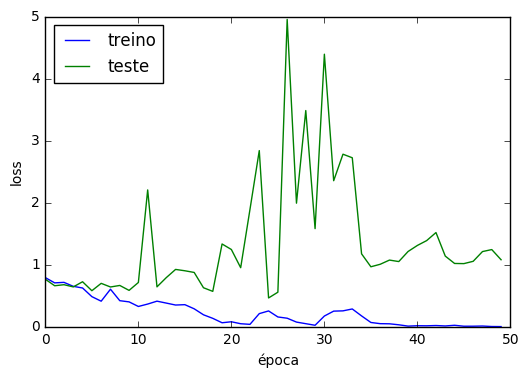

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

Cria arquivo para nos enviar

In [40]:
pred = model.predict(X_test)
np.savetxt('resul_lucas_souza.csv', pred)

In [ ]:
### Generators

In [16]:
batch_size = 12
nb_train_samples = X_train.shape[0]

In [38]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=15,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   zca_epsilon=0.1,
                                   zca_whitening=True,
                                   horizontal_flip=True)

train_generator = train_datagen.flow(x = X_train, y= y_train,
                                    batch_size=batch_size)  

/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/keras/preprocessing/image.py:492: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [41]:
epochs = 100
K.set_value(model.optimizer.lr, 0.00001)
history = model.fit_generator(
        train_generator,
        steps_per_epoch= nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val))

Epoch 1/100


/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/keras/preprocessing/image.py:571: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/keras/preprocessing/image.py:589: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


10/10 [==============================] - 13s 1s/step - loss: 0.0651 - acc: 0.9750 - val_loss: 0.2368 - val_acc: 0.9333
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 0.1159 - acc: 0.9500 - val_loss: 0.2393 - val_acc: 0.9333
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 0.3163 - acc: 0.9250 - val_loss: 0.2362 - val_acc: 0.9333
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 0.0905 - acc: 0.9500 - val_loss: 0.2350 - val_acc: 0.9333
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 0.2773 - acc: 0.9417 - val_loss: 0.2287 - val_acc: 0.9333
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 0.1564 - acc: 0.9333 - val_loss: 0.2234 - val_acc: 0.9333
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 0.1148 - acc: 0.9833 - val_loss: 0.2231 - val_acc: 0.9333
Epoch 8/100
10/10 [==============================] - 13s 1s/step - loss: 0.1344 - acc: 0.9750 -

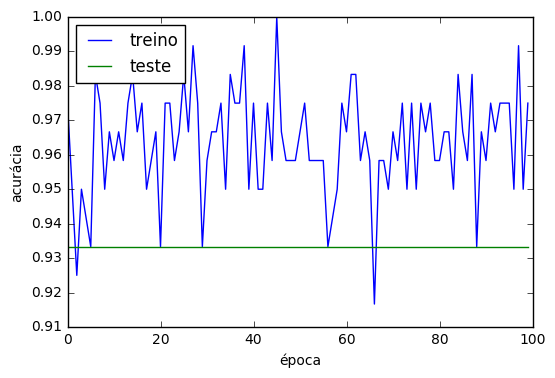

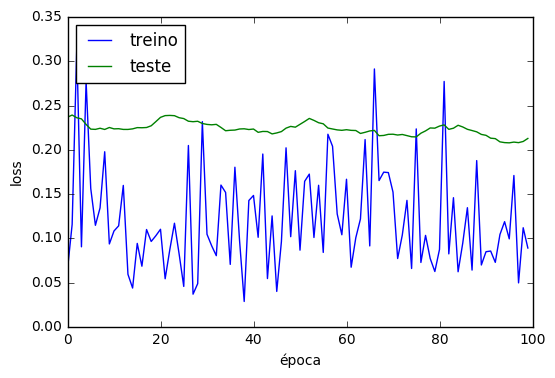

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()